# Proyecto 2-Parte I (Core)

Dataset De Mountains vs Beaches Preference: [Link en Kaggle](https://www.kaggle.com/datasets/jahnavipaliwal/mountains-vs-beaches-preference)

In [1]:
import pandas as pd


camino_ds = "./selected_dataset_mountains_vs_beaches_preferences.csv"
df = pd.read_csv(camino_ds)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     52444 non-null  int64 
 1   Gender                  52444 non-null  object
 2   Income                  52444 non-null  int64 
 3   Education_Level         52444 non-null  object
 4   Travel_Frequency        52444 non-null  int64 
 5   Preferred_Activities    52444 non-null  object
 6   Vacation_Budget         52444 non-null  int64 
 7   Location                52444 non-null  object
 8   Proximity_to_Mountains  52444 non-null  int64 
 9   Proximity_to_Beaches    52444 non-null  int64 
 10  Favorite_Season         52444 non-null  object
 11  Pets                    52444 non-null  int64 
 12  Environmental_Concerns  52444 non-null  int64 
 13  Preference              52444 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 5.6+ MB


## EDA

### Descripción del Conjunto de Datos

Este conjunto de datos tiene como objetivo analizar las preferencias del público entre dos tipos de vacaciones populares: montañas y playas. Proporciona información sobre diversos factores demográficos y de estilo de vida que pueden influir en estas preferencias. Al explorar este conjunto de datos, los usuarios pueden aplicar múltiples técnicas de aprendizaje automático para predecir si las personas prefieren montañas o playas en función de sus atributos.

### Análisis estadístico descriptivo.

#### Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.) para las variables numéricas.

In [3]:
from utils.eda_utils import obtener_estadisticas_descriptivas_df_es


obtener_estadisticas_descriptivas_df_es(df).T

,Cantidad,Mínimo,Máximo,Promedio,Desviación Estándar,Mediana,Coeficiente de Variación
Age,52444.0,18.0,69.0,43.507360,14.985597,43.0,0.344438
Income,52444.0,20001.0,119999.0,70017.271280,28847.560428,70167.0,0.412006
Travel_Frequency,52444.0,0.0,9.0,4.489265,2.876130,4.0,0.640668
Vacation_Budget,52444.0,500.0,4999.0,2741.799062,1296.922423,2733.0,0.473019
Proximity_to_Mountains,52444.0,0.0,299.0,149.943502,86.548644,150.0,0.577208
Proximity_to_Beaches,52444.0,0.0,299.0,149.888452,86.469248,150.0,0.576891
Pets,52444.0,0.0,1.0,0.500858,0.500004,1.0,0.998295
Environmental_Concerns,52444.0,0.0,1.0,0.498436,0.500002,0.0,1.003142
Preference,52444.0,0.0,1.0,0.250706,0.433423,0.0,1.728815


Podemos ver que en todos los campos el coeficiente de variación es mayor al 30%, por lo que en este dataset el promedio no parece ser representativo.

Adicionalmente, podemos encontrar columnas que muy posiblemente son booleanos, como Pets, Environmental_Concerns, Preference. Por lo cual, estas columnas deben ser convertidas.

Convertimos las columnas booleanas.

In [4]:
from utils.eda_utils import obtener_columnas

columnas = obtener_columnas(df)

columnas_convertidas_booleanas = []

valores_columnas_booleanas_potenciales = [
    set([0, 1]),
    set([0.0, 1.0]),
    set(["false", "true"]),
    set(["no", "yes"]),
    set(["no", "si"]),
]


def _convertir_valor_a_booleano(x):
    if x in [0, 0.0, "false", "no", "no"]:
        return False

    if x in [1, 1.0, "true", "yes", "si"]:
        return True

    return x


for columna in columnas:
    valores_unicos = df[columna].dropna().unique()

    columna_booleana_encontrada = False

    if len(valores_unicos) == 2:
        print(f"Valores de columna '{columna}': {str(valores_unicos)}")

        for posibilidad_valores_booleanos in valores_columnas_booleanas_potenciales:
            if set(valores_unicos) == posibilidad_valores_booleanos:
                print(f"La columna '{columna}' es booleana. Será convertida.")
                df[columna] = df[columna].apply(_convertir_valor_a_booleano)
                df[columna] = df[columna].astype("bool")

            columna_booleana_encontrada = True
            break

    if columna_booleana_encontrada:
        columnas_convertidas_booleanas.append(columna)


print(f"Columnas convertidas a booleanas: {str(columnas_convertidas_booleanas)}")

Valores de columna 'Pets': [0 1]
La columna 'Pets' es booleana. Será convertida.
Valores de columna 'Environmental_Concerns': [1 0]
La columna 'Environmental_Concerns' es booleana. Será convertida.
Valores de columna 'Preference': [1 0]
La columna 'Preference' es booleana. Será convertida.
Columnas convertidas a booleanas: ['Pets', 'Environmental_Concerns', 'Preference']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     52444 non-null  int64 
 1   Gender                  52444 non-null  object
 2   Income                  52444 non-null  int64 
 3   Education_Level         52444 non-null  object
 4   Travel_Frequency        52444 non-null  int64 
 5   Preferred_Activities    52444 non-null  object
 6   Vacation_Budget         52444 non-null  int64 
 7   Location                52444 non-null  object
 8   Proximity_to_Mountains  52444 non-null  int64 
 9   Proximity_to_Beaches    52444 non-null  int64 
 10  Favorite_Season         52444 non-null  object
 11  Pets                    52444 non-null  bool  
 12  Environmental_Concerns  52444 non-null  bool  
 13  Preference              52444 non-null  bool  
dtypes: bool(3), int64(6), object(5)
memory usage: 4.6+ MB


Verificamos ahora las columnas categóricas.

In [6]:
from utils.eda_utils import obtener_columnas_categoricas_df

columnas_categoricas = obtener_columnas_categoricas_df(df)

columnas_categoricas

['Gender',
 'Education_Level',
 'Preferred_Activities',
 'Location',
 'Favorite_Season']

Limpiamos las cadenas.

In [7]:
from utils.eda_utils import limpiar_cadena


for columna_categorica in columnas_categoricas:
    df[columna_categorica] = df[columna_categorica].apply(limpiar_cadena)

Convertimos las columnas que potencialmente sean categóricas.

In [8]:
porcentaje_max_columnas_categoricas = 0.10
cant_filas_df = df.shape[0]

columnas_a_excluir = []
columnas_convertidas_a_categoricas = []

for columna in columnas_categoricas:
    valores_unicos = df[columna].dropna().unique().tolist()
    print(f"Cant. únicos para columna '{columna}': {len(valores_unicos)}")
    if len(valores_unicos) <= (0.1 * cant_filas_df):
        
        print(f"Valores únicos columna '{columna}': {str(valores_unicos)}")
        print(f"Se procede a convertir la columna '{columna}' a categórica")
        df[columna] = df[columna].astype("category")
        columnas_convertidas_a_categoricas.append(columna)
    else:
        print(f"No se convierte la columna '{columna}'")

    del valores_unicos

print(f"\nColumnas convertidas a categóricas: {str(columnas_convertidas_a_categoricas)}")

Cant. únicos para columna 'Gender': 3
Valores únicos columna 'Gender': ['male', 'female', 'non-binary']
Se procede a convertir la columna 'Gender' a categórica
Cant. únicos para columna 'Education_Level': 4
Valores únicos columna 'Education_Level': ['bachelor', 'master', 'high school', 'doctorate']
Se procede a convertir la columna 'Education_Level' a categórica
Cant. únicos para columna 'Preferred_Activities': 4
Valores únicos columna 'Preferred_Activities': ['skiing', 'swimming', 'hiking', 'sunbathing']
Se procede a convertir la columna 'Preferred_Activities' a categórica
Cant. únicos para columna 'Location': 3
Valores únicos columna 'Location': ['urban', 'suburban', 'rural']
Se procede a convertir la columna 'Location' a categórica
Cant. únicos para columna 'Favorite_Season': 4
Valores únicos columna 'Favorite_Season': ['summer', 'fall', 'winter', 'spring']
Se procede a convertir la columna 'Favorite_Season' a categórica

Columnas convertidas a categóricas: ['Gender', 'Education_Lev

De aquí podemos notar que Education_level es posiblemente una columna ordinal, ya que el nivel de educación va incrementando. Por este motivo, hay que tenerlo en cuenta al momento de escalarla.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     52444 non-null  int64   
 1   Gender                  52444 non-null  category
 2   Income                  52444 non-null  int64   
 3   Education_Level         52444 non-null  category
 4   Travel_Frequency        52444 non-null  int64   
 5   Preferred_Activities    52444 non-null  category
 6   Vacation_Budget         52444 non-null  int64   
 7   Location                52444 non-null  category
 8   Proximity_to_Mountains  52444 non-null  int64   
 9   Proximity_to_Beaches    52444 non-null  int64   
 10  Favorite_Season         52444 non-null  category
 11  Pets                    52444 non-null  bool    
 12  Environmental_Concerns  52444 non-null  bool    
 13  Preference              52444 non-null  bool    
dtypes: bool(3), category(5

Al parecer, todas las columnas ya son correctas.

#### Analizar la distribución de las variables categóricas.

A modo de agrupar los datos, se agrega también una columna de rango de edad.

In [10]:
# Rangos etarios obtenidos de este sitio: https://www.palbin.com/es/blog/p1009-que-edad-tienen-tus-compradores-plan-de-marketing-digital.html
def obtener_rango_etario(x):
    if 0 <= x < 18:
        return "0-18"

    if 18 <= x < 25:
        return "18-25"

    if 25 <= x < 40:
        return "25-40"

    if 40 <= x < 65:
        return "40-65"
    
    return "65+"


df["Age Range"] = df["Age"].apply(obtener_rango_etario).astype("category")

Se buscan las variables categóricas.

In [11]:
from utils.eda_utils import obtener_columnas_categoricas_df


columnas_categoricas = obtener_columnas_categoricas_df(df)

columnas_categoricas

['Gender',
 'Education_Level',
 'Preferred_Activities',
 'Location',
 'Favorite_Season',
 'Age Range']

In [12]:
resumen_categorico = df.describe(include='category')

resumen_categorico

,Gender,Education_Level,Preferred_Activities,Location,Favorite_Season,Age Range
count,52444,52444,52444,52444,52444,52444
unique,3,4,4,3,4,4
top,female,doctorate,sunbathing,suburban,summer,40-65
freq,17638,13293,13221,17503,13303,25143


Vemos los únicos para cada columna.

In [13]:
for columna in columnas_categoricas:
    valores_unicos = df[columna].unique().tolist()
    print(f"Columnas únicas para '{columna}': {str(valores_unicos)}")

Columnas únicas para 'Gender': ['male', 'female', 'non-binary']
Columnas únicas para 'Education_Level': ['bachelor', 'master', 'high school', 'doctorate']
Columnas únicas para 'Preferred_Activities': ['skiing', 'swimming', 'hiking', 'sunbathing']
Columnas únicas para 'Location': ['urban', 'suburban', 'rural']
Columnas únicas para 'Favorite_Season': ['summer', 'fall', 'winter', 'spring']
Columnas únicas para 'Age Range': ['40-65', '65+', '25-40', '18-25']


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     52444 non-null  int64   
 1   Gender                  52444 non-null  category
 2   Income                  52444 non-null  int64   
 3   Education_Level         52444 non-null  category
 4   Travel_Frequency        52444 non-null  int64   
 5   Preferred_Activities    52444 non-null  category
 6   Vacation_Budget         52444 non-null  int64   
 7   Location                52444 non-null  category
 8   Proximity_to_Mountains  52444 non-null  int64   
 9   Proximity_to_Beaches    52444 non-null  int64   
 10  Favorite_Season         52444 non-null  category
 11  Pets                    52444 non-null  bool    
 12  Environmental_Concerns  52444 non-null  bool    
 13  Preference              52444 non-null  bool    
 14  Age Range             

In [15]:
columnas_categoricas = obtener_columnas_categoricas_df(df)
columnas_a_analizar = [*columnas_categoricas]


for columna in columnas_a_analizar:
    print(f"Tabla de frecuencia Columna '{columna}' vs Preference:\n")
    crosstab_column = pd.crosstab(index=df["Preference"], columns=df[columna], margins=True)
    print(crosstab_column)
    print("\n")
    print(f"Tabla de proporciones totales Columna '{columna}' vs Preference:\n")
    crosstab_column_perc = crosstab_column / crosstab_column.loc["All", "All"]
    print(crosstab_column_perc)
    print("\n")
    print(f"Tabla de proporciones por columna. Columna '{columna}' vs Preference:\n")
    crosstab_column_perc_by_column = crosstab_column / crosstab_column.loc["All"]
    print(crosstab_column_perc_by_column)

Tabla de frecuencia Columna 'Gender' vs Preference:

Gender      female   male  non-binary    All
Preference                                  
False        13221  13124       12951  39296
True          4417   4398        4333  13148
All          17638  17522       17284  52444


Tabla de proporciones totales Columna 'Gender' vs Preference:

Gender        female      male  non-binary       All
Preference                                          
False       0.252097  0.250248    0.246949  0.749294
True        0.084223  0.083861    0.082621  0.250706
All         0.336321  0.334109    0.329571  1.000000


Tabla de proporciones por columna. Columna 'Gender' vs Preference:

Gender        female      male  non-binary       All
Preference                                          
False       0.749575  0.749001    0.749306  0.749294
True        0.250425  0.250999    0.250694  0.250706
All         1.000000  1.000000    1.000000  1.000000
Tabla de frecuencia Columna 'Education_Level' vs Preferen

In [16]:
df.duplicated().sum()

0

In [17]:
from utils.eda_utils import obtener_datos_outliers_df


obtener_datos_outliers_df(df).T

,Nro. Outliers,Porc. Outliers,Límite mínimo,Límite máximo
Age,0.0,0.0,-6.500,93.500
Income,0.0,0.0,-30042.125,170198.875
Travel_Frequency,0.0,0.0,-5.500,14.500
Vacation_Budget,0.0,0.0,-1748.500,7239.500
Proximity_to_Mountains,0.0,0.0,-150.000,450.000
Proximity_to_Beaches,0.0,0.0,-148.125,448.875


### Visualizaciones.

#### Crear visualizaciones para entender la distribución de las variables (histogramas, gráficos de barras, box plots, etc.).

##### Histogramas

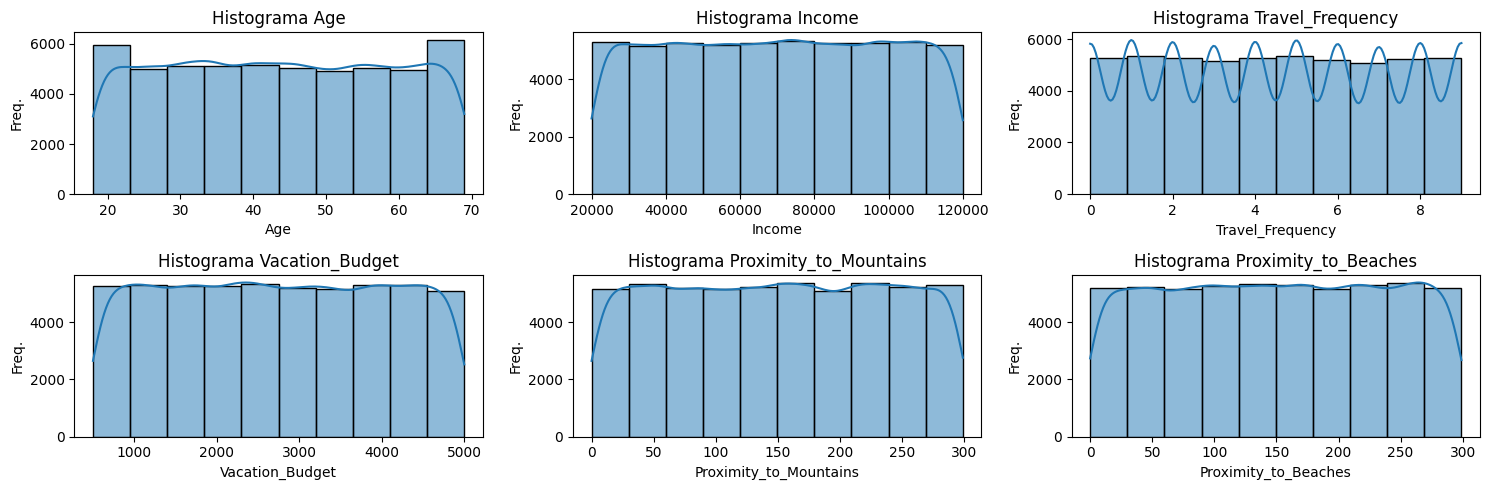

In [18]:
from utils.eda_utils import graficar_histogramas
from utils.eda_utils import obtener_columnas_numericas_df


columnas_numericas = obtener_columnas_numericas_df(df)

graficar_histogramas(df, columnas_numericas, nro_columnas=3, bins=10, kde=True, figsize=(15, 5))

De todos estos gráficos, podemos notar que las columnas no siguen una distribución normal.

##### Boxplots

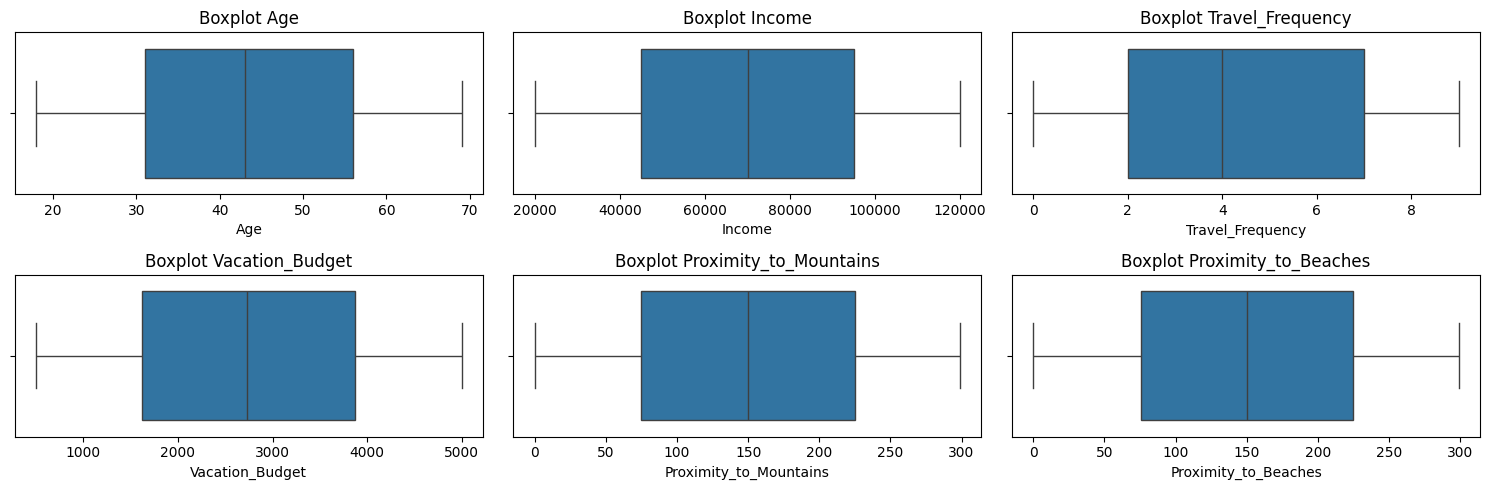

In [25]:
from utils.eda_utils import graficar_boxplots


graficar_boxplots(df, columnas_numericas, nro_columnas=3, figsize=(15, 5), vert=False)

Se puede notar en los boxplots que no se encuentran outliers. También, se puede notar que en términos de escala parece que los rangos son similares, sin contar la escala. Por lo que tal vez una buena alternativa de escalado sea utilizar la técnica MinMaxScaler.

#### Visualizar las correlaciones entre variables (mapa de calor de correlación).

##### Gráficos de dispersión de todos los campos vs columna sales

/Users/diego/Documents/Programacion/ds_bootcamp/coding-dojo-ds-bootcamp/machine_learning/2_modelos_de_clasificacion/5_proyecto_2_parte_2/selected_dataset/utils/eda_utils.py:208: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado = df.groupby([columna,
/Users/diego/Documents/Programacion/ds_bootcamp/coding-dojo-ds-bootcamp/machine_learning/2_modelos_de_clasificacion/5_proyecto_2_parte_2/selected_dataset/utils/eda_utils.py:208: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado = df.groupby([columna,
/Users/diego/Documents/Programacion/ds_bootcamp/coding-dojo-ds-bootcamp/machine_learning/2_modelos

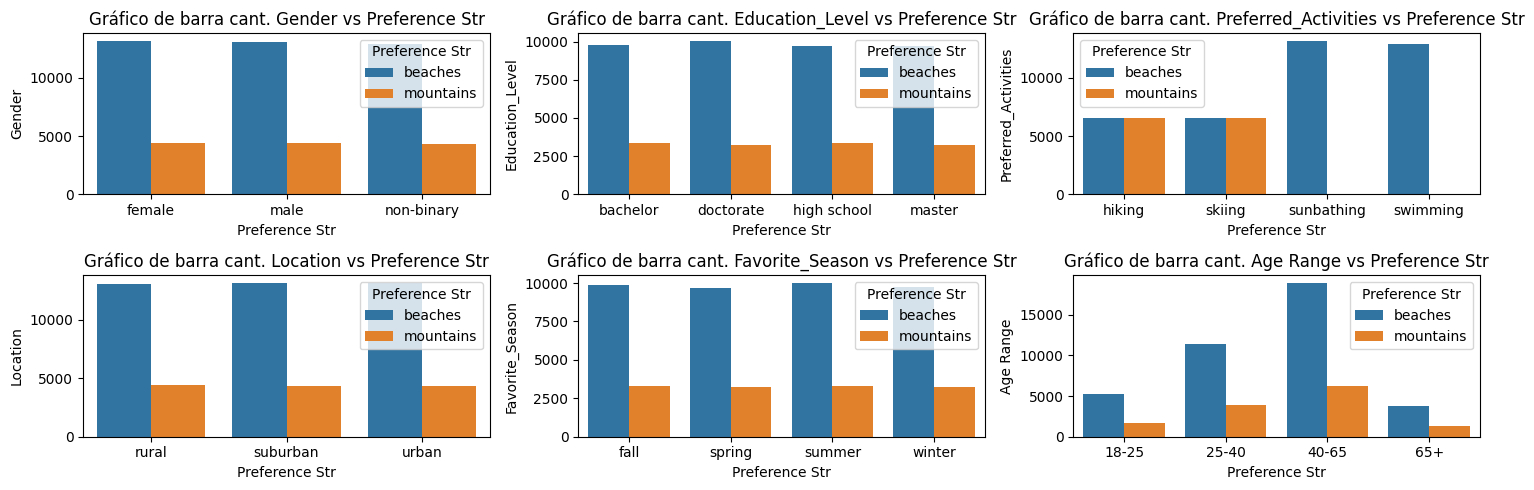

In [26]:
from utils.eda_utils import graficar_barras_conteo

df["Preference Str"] = df["Preference"].apply(lambda x: "mountains" if x else "beaches")


graficar_barras_conteo(df, columnas_categoricas, "Preference Str", figsize=(15, 5))

df.drop("Preference Str", axis=1, inplace=True)

De los gráficos de barra, podemos notar que tanto el rango de edad como la actividad influye en las preferencias, ya que se nota un icremento o decremento. Esto no se visualiza en otros gráficos, donde las cantidades son las mismas independientemente de la variable categórica siendo graficada.

##### Heatmap

                             Age    Income  Travel_Frequency  Vacation_Budget  \
Age                     1.000000 -0.000005          0.004428         0.002223   
Income                 -0.000005  1.000000         -0.000378        -0.000731   
Travel_Frequency        0.004428 -0.000378          1.000000         0.003593   
Vacation_Budget         0.002223 -0.000731          0.003593         1.000000   
Proximity_to_Mountains  0.006305 -0.005125          0.007187         0.001844   
Proximity_to_Beaches    0.002821  0.000956         -0.003404        -0.000507   
Preference Int          0.000990 -0.002998         -0.001680        -0.004754   

                        Proximity_to_Mountains  Proximity_to_Beaches  \
Age                                   0.006305              0.002821   
Income                               -0.005125              0.000956   
Travel_Frequency                      0.007187             -0.003404   
Vacation_Budget                       0.001844             -0.0

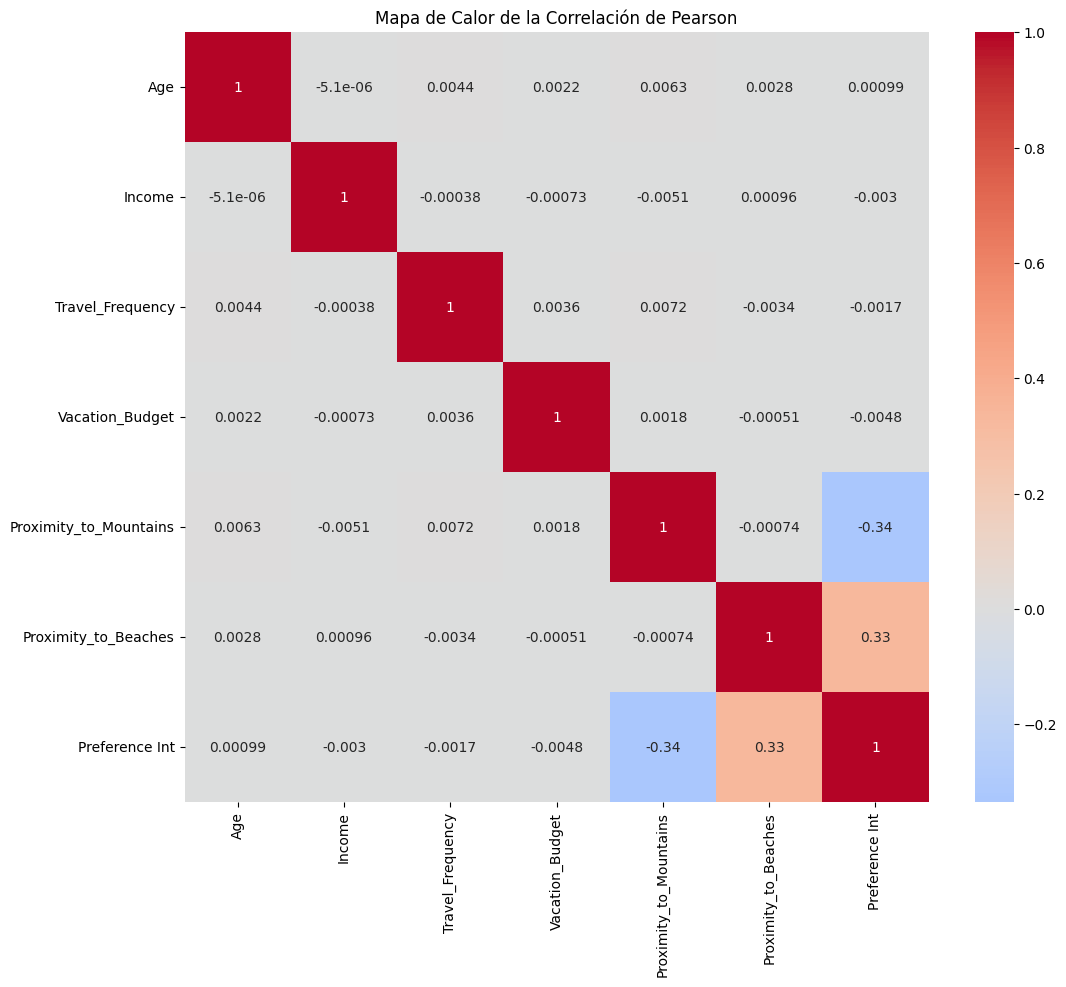

In [21]:
from utils.eda_utils import graficar_mapa_correlacion


df["Preference Int"] = df["Preference"].apply(lambda x: 1 if x else 0)


graficar_mapa_correlacion(df, columnas_numericas + ["Preference Int"], figsize=(12, 10))

df.drop("Preference Int", axis=1, inplace=True)

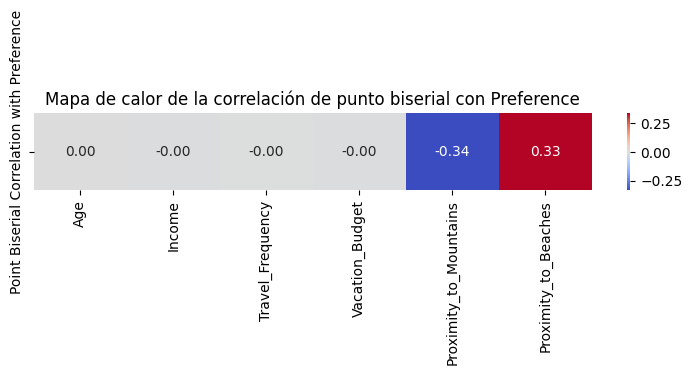

In [29]:
from scipy.stats import pointbiserialr
import matplotlib.pyplot as plt
import seaborn as sns

columnas_numericas = obtener_columnas_numericas_df(df)
# Calcular la correlación de punto biserial entre Churn y las variables numéricas
churn_corr = {col: pointbiserialr(df['Preference'], df[col])[0] for col in columnas_numericas}
# Convertir el diccionario a un DataFrame para facilitar la visualización
churn_corr_df = pd.DataFrame.from_dict(churn_corr, orient='index', columns=['Point Biserial Correlation with Preference'])
# Graficar el heatmap de las correlaciones de punto biserial
plt.figure(figsize=(9, 1))
sns.heatmap(churn_corr_df.T, annot=True, cmap='coolwarm', center=0, cbar=True, fmt=".2f")
plt.title('Mapa de calor de la correlación de punto biserial con Preference')
plt.show()

Podemos notar que las siguientes variables poseen una correlación con Preferences:

* Proximity_to_Mountains
* Proximity_to_Beaches

### Identificación de Valores Nulos y Outliers:

#### Detectar valores nulos y discutir cómo podrían ser tratados.

In [22]:
from utils.eda_utils import obtener_estadisticas_datos_nulos


obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
Age,52444,0,0.0
Gender,52444,0,0.0
Income,52444,0,0.0
Education_Level,52444,0,0.0
Travel_Frequency,52444,0,0.0
Preferred_Activities,52444,0,0.0
Vacation_Budget,52444,0,0.0
Location,52444,0,0.0
Proximity_to_Mountains,52444,0,0.0
Proximity_to_Beaches,52444,0,0.0


No existen valores nulos en este dataset, por lo que no será necesario tratarlos.

#### Identificar outliers y evaluar su impacto potencial en el análisis.

In [23]:
from utils.eda_utils import obtener_datos_outliers_df


obtener_datos_outliers_df(df).T

,Nro. Outliers,Porc. Outliers,Límite mínimo,Límite máximo
Age,0.0,0.0,-6.500,93.500
Income,0.0,0.0,-30042.125,170198.875
Travel_Frequency,0.0,0.0,-5.500,14.500
Vacation_Budget,0.0,0.0,-1748.500,7239.500
Proximity_to_Mountains,0.0,0.0,-150.000,450.000
Proximity_to_Beaches,0.0,0.0,-148.125,448.875


No existen outliers en el dataset, por lo que no será necesario tratar estos datos.

### Resumen de Hallazgos:

Del EDA, se puede destacar lo siguiente

* El dataset es bueno para aplicar métodos de clasificación binarias y multiclase
* Según los histogramas, se puede notar que varias columnas no siguen una distribución estándar, pero tampoco existen outliers. Por lo cual, se puede considerar el uso de MinMaxScaler para el esccalamiento.
* No existen outliers
* Existen correlaciones entre Preference con las columnas Proximity_to_Beaches y Proximity_to_Mountains
* Se puede notar una relación entre Preference Preferred_Activity y Age_Range (agrupación de columna Age por rango de edad)